![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Abstract

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

Microsoft wants to start a new streaming and movie division to compete with the likes of Netflix, Hulu, Amazon, Apple, and other major streaming services after seeing competitors’ various success in the field and it is good for large businesses to expand into a variety of industries as to have a more diverse portfolio. The theatric box office and home entertainment is a $100 billion dollar industry (variety, 2022). With a sector this large and with high potential return on investment, it would be a great opportunity for Microsoft to achieve an additional source of revenue for Microsoft, it will be another means to reach more potential customers for other sectors of the organization. 

To find where to start this new division we will be answering the following questions:


* What is the best genre of movie to start with?
* When would be the ideal release date?
* Who should be chosen as the director for the film?

To accomplish this, we will be using data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB and The Numbers.


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

The data we will be using for this project comes from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB and The Numbers. It contains information on movies, such as: the key personal involved in producing the films, reviews, and financials.
The key factors that we will be using to find achieve our goals of best genre, time of release and ideal director will be the financials of the movies (global gross and production budget), the release month of films and how films perform in each month, and who directed the most successful films in the genre that has the most potential. This should leave s with a solid starting point to break into the cinematic industry. 

The most important data we will be looking it is the financials. Besides global gross and the production budget, we will look at profit (global gross – production budget) and the return of investment (ROI = (profit/production budget)*100). There are other factors that we will not be going into that are not factored into this (such as advertising and other expenses). 


In [408]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#!pip install pandasql
from datetime import datetime

In [152]:
#Set global for SQL to work more effeciently
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [461]:
# Import datafiles and turn into DataFrames

persons = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
#akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
#principals = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
#ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

#profit = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
#reviews = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep ='\t', encoding= 'unicode_escape')
details = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep ='\t')

tmdb = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')


### Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [462]:
crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [463]:
persons

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [464]:
#Start by getting the director names connected to tconst (movie code)
q = """
SELECT c.tconst, p.primary_name AS director_name
FROM crew AS c
JOIN persons AS p
    ON c.directors = p.nconst
"""
director = pysqldf(q)
director

,tconst,director_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0879859,Eric Manchester
4,tt0996958,Tara Cardinal
...,...,...
124684,tt8998302,Daryl Boman
124685,tt8999892,C. Damon Adcock
124686,tt8999974,Daysi Burbano
124687,tt9001390,Bernard Lessa


In [466]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [467]:
#The values for production_budget, domestic_gross and worldwide_gross are strings, clean and convert to floats.
budget['production_budget'] = budget['production_budget'].str.replace('$','').str.replace(',','').astype('float')
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$','').str.replace(',','').astype('float')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$','').str.replace(',','').astype('float')

Make a profit column (worldwide_gross - production_budget) and return on investment (roi) ((profit/production_budget)*100)

In [468]:
#Take the converted financial columns and find the profit (worldwide_gross - production_budget) as well as the return on investment (roi).
budget['profit'] = budget['worldwide_gross'] - budget['production_budget']
budget['roi'] = (budget['profit']/budget['production_budget']) * 100

In [469]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.369636
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-100.000000
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.344950e+05,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-100.000000


Make a DataFrame from the data we will need.

In [481]:
#add genres and directors to the budget DataFrame, leaving out unneeded columns
q = """
SELECT b.movie, ba.tconst, t.release_date, b.production_budget, b.worldwide_gross, b.profit, b.roi, ba.genres, d.director_name, t.vote_average 
FROM budget AS b
JOIN basics AS ba
    ON b.movie = ba.primary_title
JOIN tmdb AS t
    ON b.movie = t.original_title
JOIN director AS d
    ON ba.tconst = d.tconst
"""
budget2 = pysqldf(q)
budget2

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Horror,Atsushi Wada,7.4
1,Pirates of the Caribbean: On Stranger Tides,tt1298650,2011-05-20,410600000.0,1.045664e+09,6.350639e+08,154.667286,"Action,Adventure,Fantasy",Rob Marshall,6.4
2,Avengers: Age of Ultron,tt2395427,2015-05-01,330600000.0,1.403014e+09,1.072414e+09,324.384139,"Action,Adventure,Sci-Fi",Joss Whedon,7.3
3,Justice League,tt0974015,2017-11-17,300000000.0,6.559452e+08,3.559452e+08,118.648403,"Action,Adventure,Fantasy",Zack Snyder,6.2
4,Justice League,tt0974015,2017-11-17,300000000.0,6.559452e+08,3.559452e+08,118.648403,"Action,Adventure,Fantasy",Zack Snyder,6.2
...,...,...,...,...,...,...,...,...,...,...
3744,Ten,tt2309562,2014-03-28,25000.0,0.000000e+00,-2.500000e+04,-100.000000,Drama,Craig Wyting,5.4
3745,Ten,tt6415838,2014-03-28,25000.0,0.000000e+00,-2.500000e+04,-100.000000,"Horror,Mystery,Thriller",Chris Robert,5.4
3746,Dry Spell,tt2375036,2013-02-14,22000.0,0.000000e+00,-2.200000e+04,-100.000000,"Comedy,Romance",Travis Legge,6.0
3747,All Superheroes Must Die,tt1836212,2013-01-04,20000.0,0.000000e+00,-2.000000e+04,-100.000000,"Sci-Fi,Thriller",Jason Trost,3.9


In [482]:
#Avatar is not a horror film, unlike this data
budget2.at[0, 'genres'] = 'Action,Adventure,Sci-Fi'

budget2.at[0, 'director_name'] = 'James Cameron'

In [483]:
budget2

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,"Action,Adventure,Sci-Fi",James Cameron,7.4
1,Pirates of the Caribbean: On Stranger Tides,tt1298650,2011-05-20,410600000.0,1.045664e+09,6.350639e+08,154.667286,"Action,Adventure,Fantasy",Rob Marshall,6.4
2,Avengers: Age of Ultron,tt2395427,2015-05-01,330600000.0,1.403014e+09,1.072414e+09,324.384139,"Action,Adventure,Sci-Fi",Joss Whedon,7.3
3,Justice League,tt0974015,2017-11-17,300000000.0,6.559452e+08,3.559452e+08,118.648403,"Action,Adventure,Fantasy",Zack Snyder,6.2
4,Justice League,tt0974015,2017-11-17,300000000.0,6.559452e+08,3.559452e+08,118.648403,"Action,Adventure,Fantasy",Zack Snyder,6.2
...,...,...,...,...,...,...,...,...,...,...
3744,Ten,tt2309562,2014-03-28,25000.0,0.000000e+00,-2.500000e+04,-100.000000,Drama,Craig Wyting,5.4
3745,Ten,tt6415838,2014-03-28,25000.0,0.000000e+00,-2.500000e+04,-100.000000,"Horror,Mystery,Thriller",Chris Robert,5.4
3746,Dry Spell,tt2375036,2013-02-14,22000.0,0.000000e+00,-2.200000e+04,-100.000000,"Comedy,Romance",Travis Legge,6.0
3747,All Superheroes Must Die,tt1836212,2013-01-04,20000.0,0.000000e+00,-2.000000e+04,-100.000000,"Sci-Fi,Thriller",Jason Trost,3.9


In [484]:
#Here we can see that there are a few null values in genres. Being so few rows, it would be best to drop this data.
budget2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3749 non-null   object 
 1   tconst             3749 non-null   object 
 2   release_date       3749 non-null   object 
 3   production_budget  3749 non-null   float64
 4   worldwide_gross    3749 non-null   float64
 5   profit             3749 non-null   float64
 6   roi                3749 non-null   float64
 7   genres             3716 non-null   object 
 8   director_name      3749 non-null   object 
 9   vote_average       3749 non-null   float64
dtypes: float64(5), object(5)
memory usage: 293.0+ KB


In [476]:
#There are some films that have 0 for worldwide_gross, these either never got released or are errors. 
#It would be best to remove.
budget2.describe()

,production_budget,worldwide_gross,profit,roi,vote_average
count,3.749000e+03,3.749000e+03,3.749000e+03,3749.000000,3749.000000
mean,3.416243e+07,9.933540e+07,6.517297e+07,578.734253,6.130621
std,4.722128e+07,1.874799e+08,1.527444e+08,1866.496543,1.285466
min,9.000000e+03,0.000000e+00,-1.104502e+08,-100.000000,0.000000
25%,4.500000e+06,1.703281e+06,-2.898227e+06,-74.840125,5.500000
50%,1.500000e+07,3.435676e+07,1.119083e+07,62.898889,6.200000
75%,4.000000e+07,9.512734e+07,5.964668e+07,283.738693,7.000000
max,4.250000e+08,2.776345e+09,2.351345e+09,26292.161404,10.000000


In [485]:
#Dropping null values from the data.
budget2 = budget2.dropna()

In [486]:
#remove replicated rows
budget2 = budget2.drop_duplicates(subset=['tconst'], keep='first')

In [487]:
#budget2.genres = budget2.genres.astype(str)

In [488]:
#Convert date from a string to datetime
budgetbomb['release_date'] = pd.to_datetime(budgetbomb['release_date'])

#Create a new column of the month each movie was released
budget2['month'] = pd.DatetimeIndex(budget2['release_date']).month
#budgetbomb['year'] = pd.DatetimeIndex(budgetbomb['release_date']).year


In [489]:
#budget2['genres'] = budget2['genres'].fillna('Unknown')
#budget2['genres'] = budget2['genres'].dropna()
budget2['genres'] = budget2['genres'].map(lambda x: x.split(','))


#Seperate budget into individual genres
budgetbomb = budget2.explode('genres')


#drop rows where global_gross and production_budget are zero
budgetbomb = budgetbomb[budgetbomb.worldwide_gross != 0.0]
budgetbomb = budgetbomb[budgetbomb.production_budget != 0.0]








In [495]:
budgetbomb

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average,month
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Action,James Cameron,7.4,12
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Adventure,James Cameron,7.4,12
0,Avatar,tt1775309,2009-12-18,425000000.0,2.776345e+09,2.351345e+09,553.257713,Sci-Fi,James Cameron,7.4,12
1,Pirates of the Caribbean: On Stranger Tides,tt1298650,2011-05-20,410600000.0,1.045664e+09,6.350639e+08,154.667286,Action,Rob Marshall,6.4,5
1,Pirates of the Caribbean: On Stranger Tides,tt1298650,2011-05-20,410600000.0,1.045664e+09,6.350639e+08,154.667286,Adventure,Rob Marshall,6.4,5
...,...,...,...,...,...,...,...,...,...,...,...
3742,Exeter,tt1945044,2015-03-26,25000.0,4.897920e+05,4.647920e+05,1859.168000,Mystery,Marcus Nispel,4.7,3
3742,Exeter,tt1945044,2015-03-26,25000.0,4.897920e+05,4.647920e+05,1859.168000,Thriller,Marcus Nispel,4.7,3
3743,Exeter,tt2782686,2015-03-26,25000.0,4.897920e+05,4.647920e+05,1859.168000,Horror,Ann Tramonte,4.7,3
3748,Newlyweds,tt1880418,2011-12-26,9000.0,4.584000e+03,-4.416000e+03,-49.066667,Comedy,Edward Burns,5.4,12


In [491]:
mediangenre = budgetbomb.groupby('genres').median()
mediangenre

,production_budget,worldwide_gross,profit,roi,vote_average,month
genres,,,,,,
Action,49500000.0,98230839.0,45205810.0,107.596899,6.1,7.0
Adventure,90000000.0,206627518.0,110328374.0,134.808009,6.2,6.0
Animation,80000000.0,249804783.0,148681323.5,176.167847,6.4,7.0
Biography,20000000.0,28400715.0,9876855.0,72.503563,6.7,9.0
Comedy,21000000.0,46640009.5,18831384.0,114.836610,6.1,6.5
Crime,25000000.0,31476380.5,7446351.0,47.251968,6.2,7.0
Documentary,15000000.0,19482268.0,4206732.0,45.511864,6.4,7.0
Drama,16000000.0,24001573.0,6891011.0,55.807044,6.5,7.0
Family,35000000.0,60376247.0,29174545.0,95.303086,6.3,8.0


# Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [496]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

In [497]:
#Create a definition to sort values in graphs
def sort(value):
    return budgetbomb.loc[:,['genres', value]].groupby(['genres']).median().sort_values(by=value, ascending=False).index

In [394]:
# Here you run your code to model the data
#ax2sorted_genres_index = budgetbomb.groupby(by=['genres'])['roi'].median().iloc[::-1].index

#sorted_genres_index = sns.swarmplot(data=budgetbomb, x='release_date', y='roi');

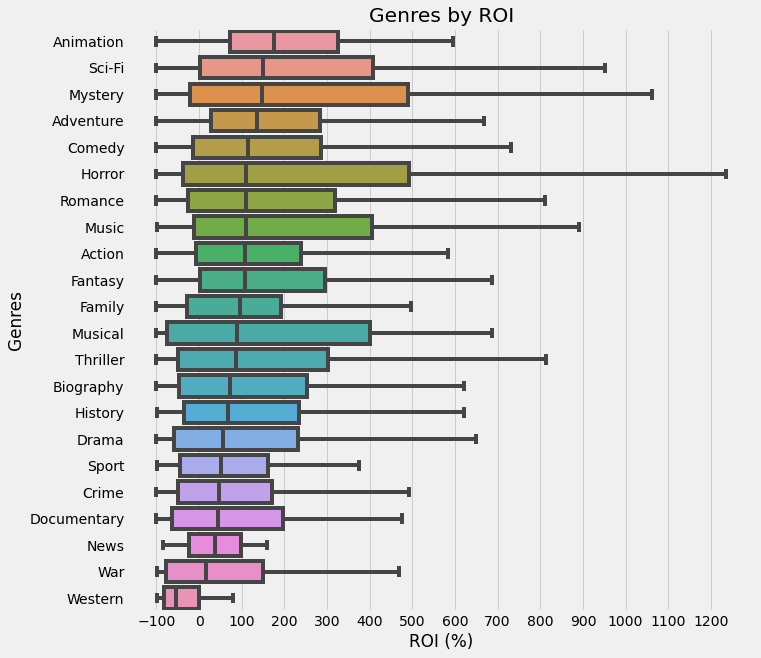

In [546]:
# roi by genre without outliers
ROIgenre = sns.boxplot(x='roi', y='genres', data=budgetbomb, showfliers= False, order=sort('roi'))
ROIgenre.set_title('Genres by ROI')
ROIgenre.set_ylabel('Genres')
ROIgenre.set_xlabel('ROI (%)')
plt.xticks([-100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]);

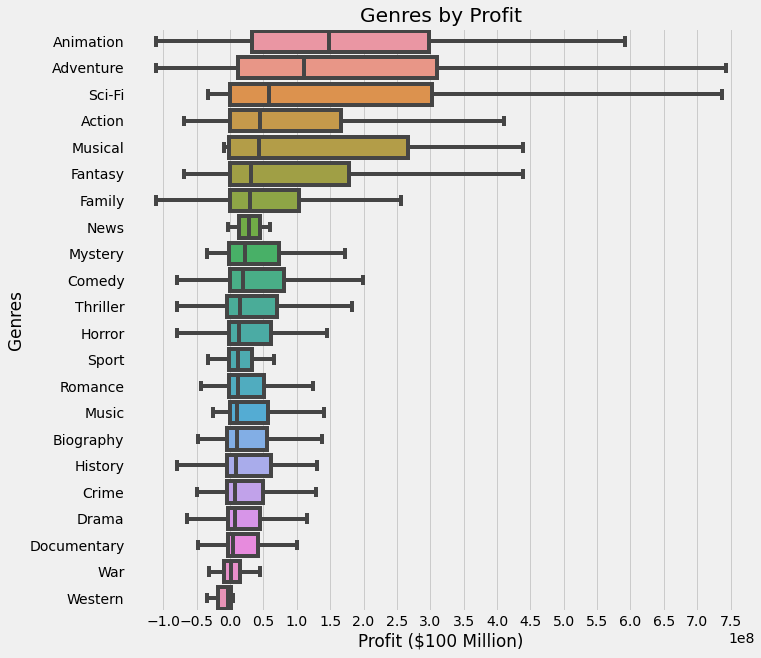

In [563]:
ProfitGenre = sns.boxplot(x='profit', y='genres', data=budgetbomb, showfliers= False, order=sort('profit'))
ProfitGenre.set_title('Genres by Profit')
ProfitGenre.set_ylabel('Genres')
ProfitGenre.set_xlabel('Profit ($100 Million)')
plt.xticks([-1e8, -0.5e8, 0, 0.5e8, 1e8, 1.5e8, 2e8, 2.5e8, 3e8, 3.5e8, 4e8, 4.5e8, 5e8, 5.5e8, 6e8, 6.5e8, 7e8, 7.5e8]);

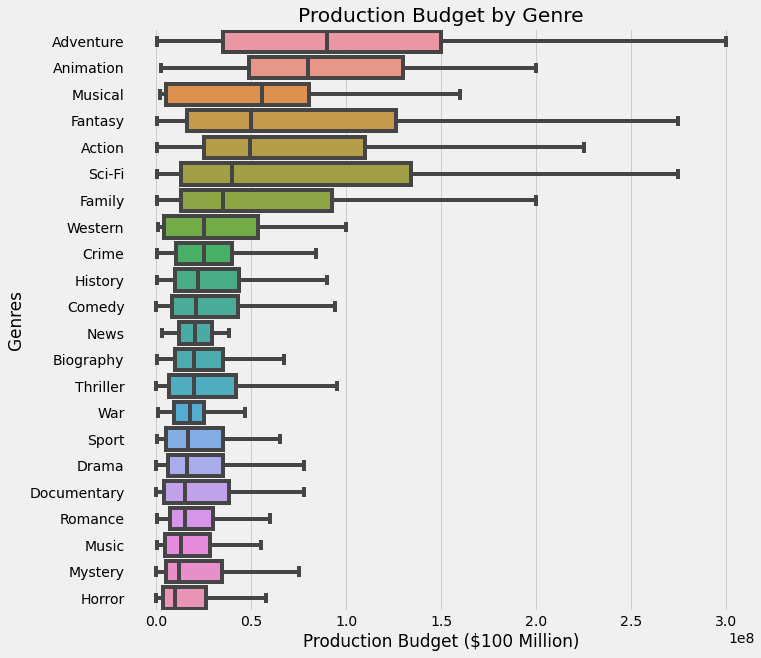

In [587]:
GenreBudget = sns.boxplot(x='production_budget', y='genres', data=budgetbomb, showfliers= False, order=sort('production_budget'))
GenreBudget.set_title('Production Budget by Genre')
GenreBudget.set_ylabel('Genres')
GenreBudget.set_xlabel('Production Budget ($100 Million)');


In [522]:
#sns.boxplot(x='vote_average', y='genres', data=budgetbomb, order=sort('vote_average'));

## Review Modeling

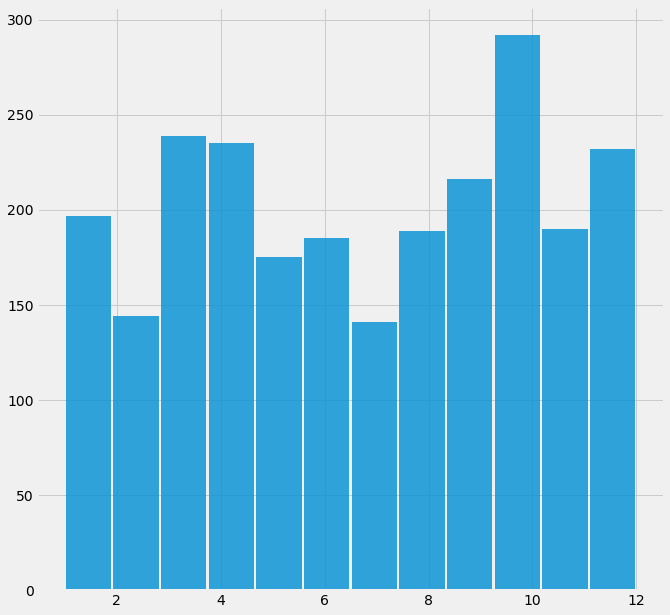

In [583]:
plt.hist(x=budget2['month'], bins=12, alpha=0.8, rwidth=0.95);


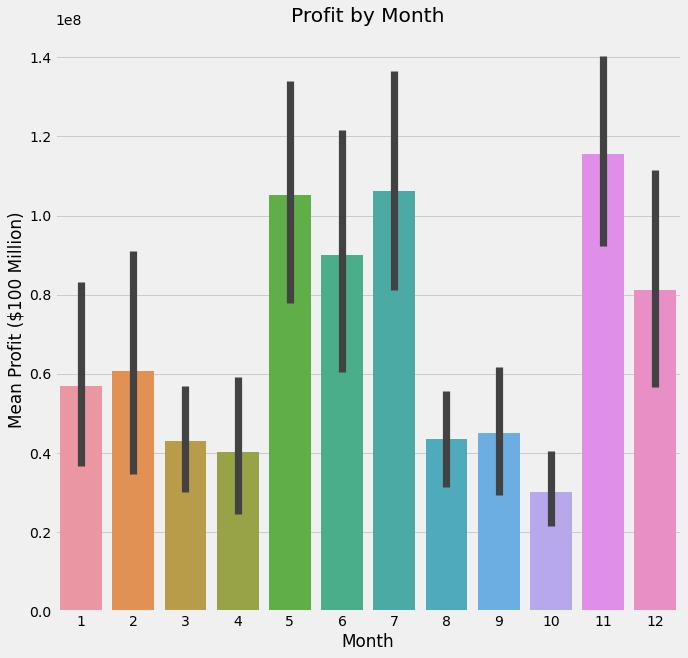

In [585]:
monthlyProfit = sns.barplot(x='month', y='profit', data=budget2)
monthlyProfit.set_title('Profit by Month')
monthlyProfit.set_ylabel('Mean Profit ($100 Million)')
monthlyProfit.set_xlabel('Month');

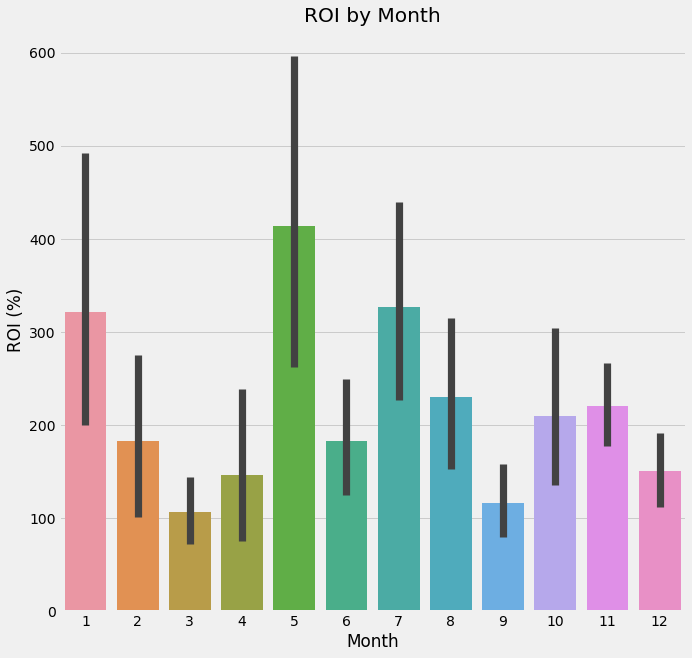

In [586]:
monthlyROI = sns.barplot(x='month', y='roi', data=budget2)
monthlyROI.set_title('ROI by Month')
monthlyROI.set_ylabel('ROI (%)')
monthlyROI.set_xlabel('Month');

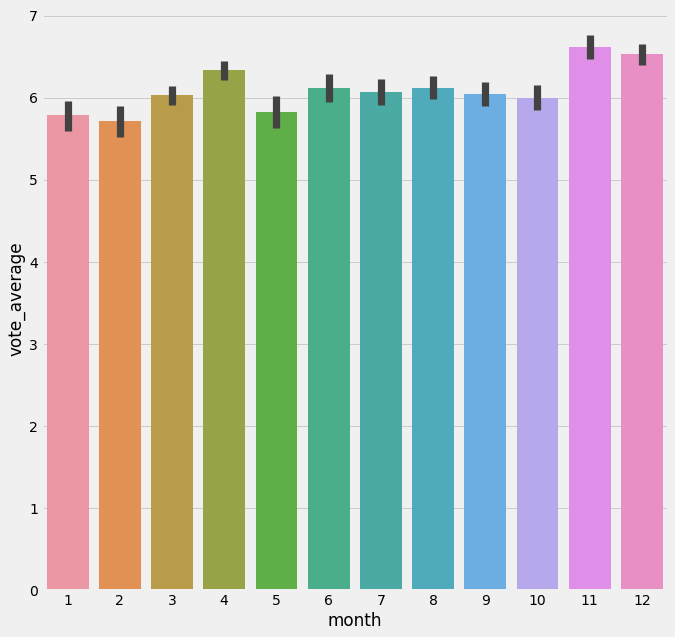

In [506]:
sns.barplot(x='month', y='vote_average', data=budget2);

In [507]:
#Create a function to select and isolate a genre
def isolate_genre (genrepick):
    df = budgetbomb[budgetbomb['genres'].map(lambda genre: genre == genrepick)]
    return(df)

In [508]:
horror = isolate_genre('Horror')
horror

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average,month
57,World War Z,tt0816711,2013-06-21,190000000.0,531514650.0,341514650.0,179.744553,Horror,Marc Forster,6.7,6
77,The Meg,tt4779682,2018-08-10,178000000.0,529530715.0,351530715.0,197.489166,Horror,Jon Turteltaub,5.9,8
92,Coco,tt7002100,2017-11-22,175000000.0,798008101.0,623008101.0,356.004629,Horror,Neil Boultby,8.2,11
142,Dark Shadows,tt1077368,2012-05-11,150000000.0,238202668.0,88202668.0,58.801779,Horror,Tim Burton,5.9,5
144,The Wolfman,tt0780653,2010-02-12,150000000.0,142634358.0,-7365642.0,-4.910428,Horror,Joe Johnston,5.7,2
...,...,...,...,...,...,...,...,...,...,...,...
3689,Speak No Evil,tt2503358,2013-05-24,150000.0,32927.0,-117073.0,-78.048667,Horror,Roze,3.6,5
3716,Absentia,tt1610996,2011-03-03,70000.0,8555.0,-61445.0,-87.778571,Horror,Mike Flanagan,5.9,3
3732,Raymond Did It,tt1716760,2011-03-27,40000.0,3632.0,-36368.0,-90.920000,Horror,Travis Legge,3.7,3
3742,Exeter,tt1945044,2015-03-26,25000.0,489792.0,464792.0,1859.168000,Horror,Marcus Nispel,4.7,3


In [581]:
#sns.catplot(x='month', y='roi', kind = 'swarm', data=mystery);

In [509]:
mystery = isolate_genre('Mystery')
mystery

,movie,tconst,release_date,production_budget,worldwide_gross,profit,roi,genres,director_name,vote_average,month
65,Blade Runner 2049,tt1856101,2017-10-06,185000000.0,259357408.0,74357408.0,40.193194,Mystery,Denis Villeneuve,7.4,10
307,Salt,tt0944835,2010-07-23,130000000.0,290650494.0,160650494.0,123.577303,Mystery,Phillip Noyce,6.3,7
328,Prometheus,tt1446714,2012-06-08,125000000.0,402448265.0,277448265.0,221.958612,Mystery,Ridley Scott,6.4,6
331,Total Recall,tt1386703,2012-08-03,125000000.0,211856088.0,86856088.0,69.484870,Mystery,Len Wiseman,5.9,8
442,The Girl with the Dragon Tattoo,tt1568346,2011-12-14,90000000.0,239373970.0,149373970.0,165.971078,Mystery,David Fincher,7.3,12
...,...,...,...,...,...,...,...,...,...,...,...
3442,The Journey,tt3025936,2017-06-16,500000.0,19800.0,-480200.0,-96.040000,Mystery,Lance Nielsen,6.7,6
3668,The Overnight,tt3844362,2015-06-19,200000.0,1165996.0,965996.0,482.998000,Mystery,Patrick Brice,6.0,6
3691,Sound of My Voice,tt1748207,2011-01-22,135000.0,429448.0,294448.0,218.109630,Mystery,Zal Batmanglij,6.4,1
3716,Absentia,tt1610996,2011-03-03,70000.0,8555.0,-61445.0,-87.778571,Mystery,Mike Flanagan,5.9,3


In [520]:
q4 = """
SELECT director_name, movie, genres, production_budget, worldwide_gross, profit, roi, vote_average
FROM horror
ORDER BY roi DESC
LIMIT 10
"""

horror_director = pysqldf(q4)

In [521]:
horror_director

,director_name,movie,genres,production_budget,worldwide_gross,profit,roi,vote_average
0,William Brent Bell,The Devil Inside,Horror,1000000.0,101759490.0,100759490.0,10075.949000,4.7
1,James Wan,Insidious,Horror,1500000.0,99870886.0,98370886.0,6558.059067,6.9
2,Levan Gabriadze,Unfriended,Horror,1000000.0,64364198.0,63364198.0,6336.419800,5.4
3,Tod Williams,Paranormal Activity 2,Horror,3000000.0,177512032.0,174512032.0,5817.067733,5.7
4,M. Night Shyamalan,Split,Horror,5000000.0,278964806.0,273964806.0,5479.296120,5.3
5,Jordan Peele,Get Out,Horror,5000000.0,255367951.0,250367951.0,5007.359020,5.5
6,Jill Wong,Moonlight,Horror,1500000.0,65245512.0,63745512.0,4249.700800,7.4
7,Bradley Parker,Chernobyl Diaries,Horror,1000000.0,42411721.0,41411721.0,4141.172100,5.0
8,John R. Leonetti,Annabelle,Horror,6500000.0,256862920.0,250362920.0,3851.737231,5.6
9,Daniel Stamm,The Last Exorcism,Horror,1800000.0,70165900.0,68365900.0,3798.105556,5.6


In [516]:
q5 = """
SELECT director_name, movie, genres, production_budget, worldwide_gross, profit, roi, vote_average
FROM mystery
ORDER BY roi DESC
LIMIT 10
"""

mystery_director = pysqldf(q5)

In [517]:
mystery_director

,director_name,movie,genres,production_budget,worldwide_gross,profit,roi,vote_average
0,James Wan,Insidious,Mystery,1500000.0,99870886.0,98370886.0,6558.059067,6.9
1,Levan Gabriadze,Unfriended,Mystery,1000000.0,64364198.0,63364198.0,6336.419800,5.4
2,Jordan Peele,Get Out,Mystery,5000000.0,255367951.0,250367951.0,5007.359020,5.5
3,Bradley Parker,Chernobyl Diaries,Mystery,1000000.0,42411721.0,41411721.0,4141.172100,5.0
4,John R. Leonetti,Annabelle,Mystery,6500000.0,256862920.0,250362920.0,3851.737231,5.6
5,Fabrice Gobert,Lights Out,Mystery,5000000.0,148806510.0,143806510.0,2876.130200,6.3
6,David F. Sandberg,Lights Out,Mystery,5000000.0,148806510.0,143806510.0,2876.130200,6.3
7,Scott Derrickson,Sinister,Mystery,3000000.0,87727807.0,84727807.0,2824.260233,3.8
8,Christopher Landon,Happy Death Day,Mystery,5000000.0,125010260.0,120010260.0,2400.205200,6.6
9,Dan Trachtenberg,10 Cloverfield Lane,Mystery,5000000.0,108286422.0,103286422.0,2065.728440,6.9


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

The highest ROI and profits are from the highest production budget genres. What stuck out is that 

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***